Model Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        87
           1       0.67      0.68      0.67        56

    accuracy                           0.74       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14412\1346265132.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='coolwarm')


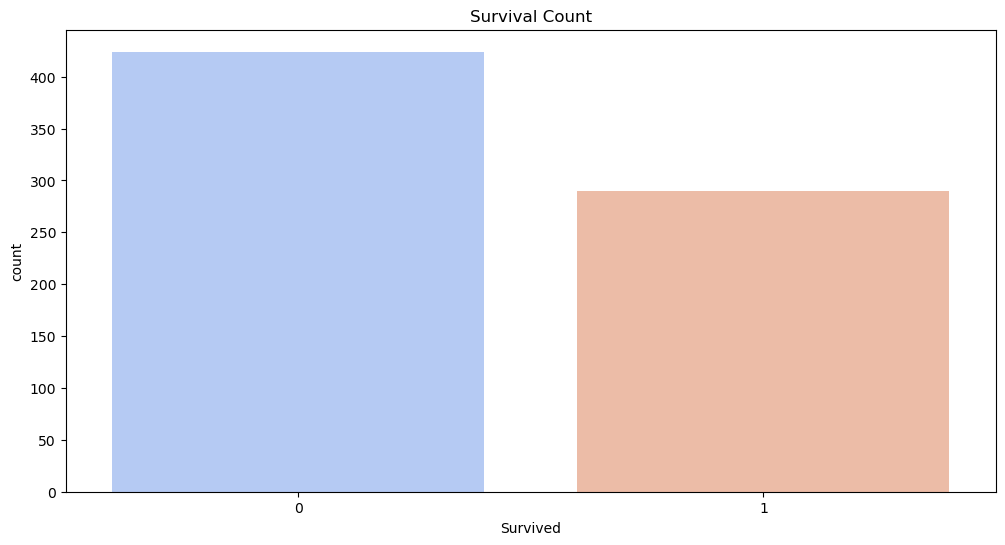

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14412\1346265132.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=data, palette='coolwarm')


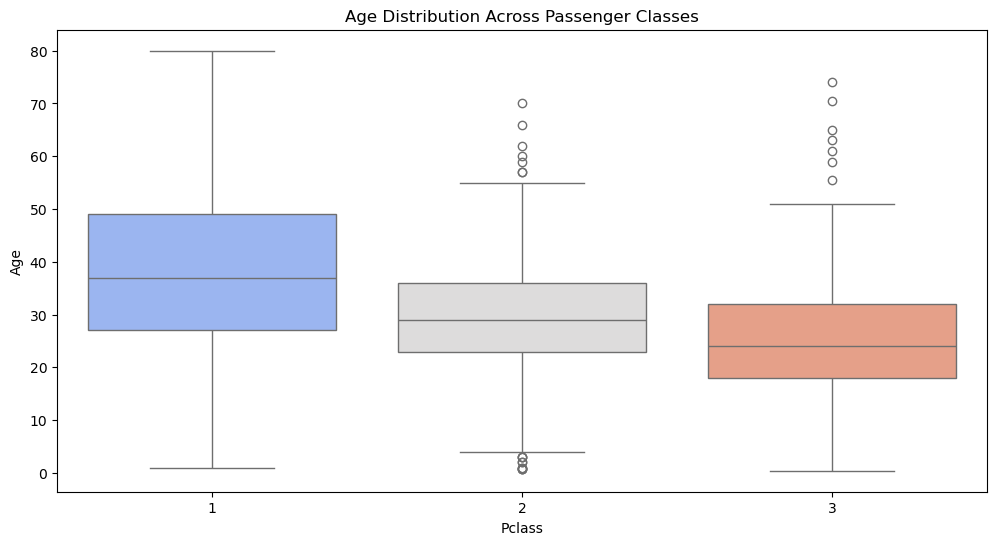

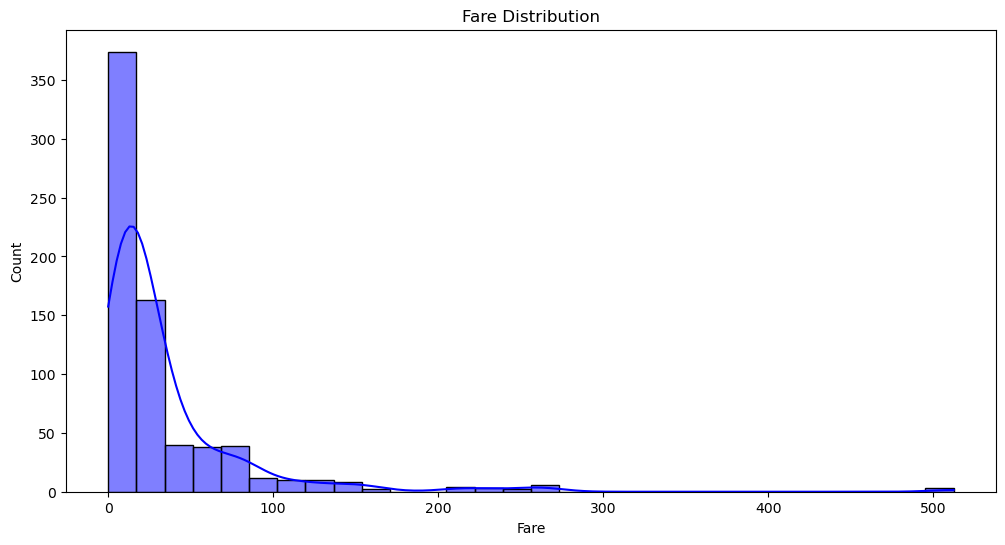

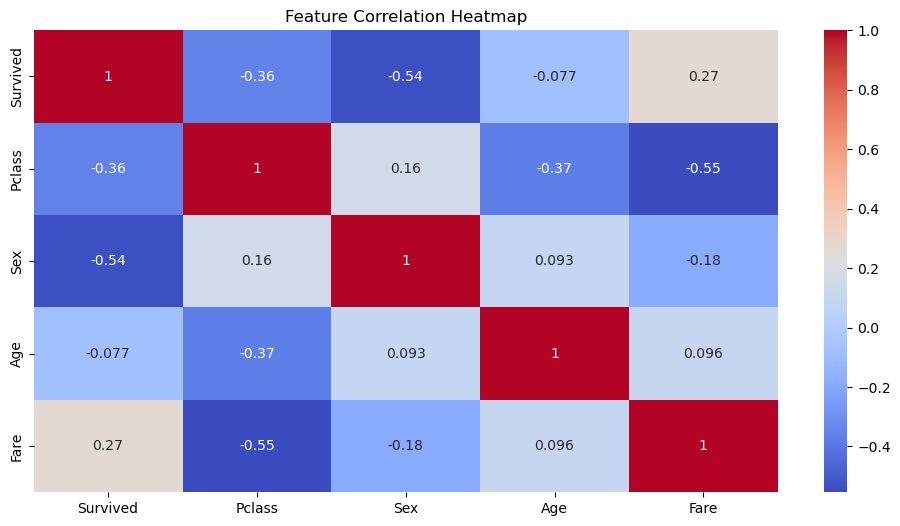

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load Titanic dataset
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Select relevant features and drop missing values
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].dropna()

# Encode categorical variable
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# Split data into training and testing sets
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=data, palette='coolwarm')
plt.title("Survival Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=data, palette='coolwarm')
plt.title("Age Distribution Across Passenger Classes")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['Fare'], bins=30, kde=True, color='blue')
plt.title("Fare Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
